# Scikit-Learn Classifiers
- MLPClassifier
- DecisionTreeClassifier with AdaBoostClassifier

## Set up Data (non-linearly-separable)

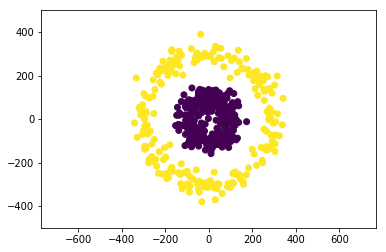

            x           y
0 -294.658162 -139.317303
1  226.220926  178.738419
2  -62.871479  -84.429520
3 -301.430216  -54.599564
4    4.852229   75.101412


In [1]:
%matplotlib inline

import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  

# Generate the artificial data and display resulting scatter plot 
x = []
y = []
z = []
for i in range(500):
    rand = np.random.uniform(0.0, 2*math.pi)
    randx = np.random.normal(0.0, 30.0)
    randy = np.random.normal(0.0, 30.0)
    if np.random.random() > 0.5:
        z.append(0)
        x.append(100*math.cos(rand) + randx)
        y.append(100*math.sin(rand) + randy)
    else:
        z.append(1)
        x.append(300*math.cos(rand) + randx)
        y.append(300*math.sin(rand) + randy)
plt.axis('equal')
plt.axis([-500, 500, -500, 500])
plt.scatter(x, y, c=z)
plt.show()

# Convert list data to dataframes
XY = pd.DataFrame({'x': x, 'y': y})
print(XY.head())
Z = pd.DataFrame({'z': z})

## MLPClassifier

[[59  0]
 [ 2 39]]
             precision    recall  f1-score   support

          0       0.97      1.00      0.98        59
          1       1.00      0.95      0.97        41

avg / total       0.98      0.98      0.98       100



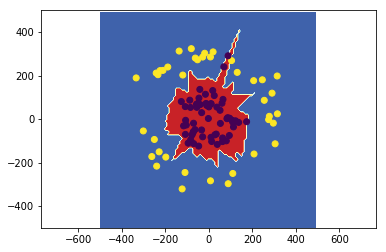

In [2]:
# Split the data into training data and testing data
XY_train, XY_test, Z_train, Z_test = train_test_split(XY, Z, test_size = 0.20)

# Run MLPClassifier algorithm on the training data
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(XY_train, Z_train.values.ravel())

# Make predictions on the testing data and display resulting scatter plot
predictions = mlp.predict(XY_test)

# See how well it worked
print(confusion_matrix(Z_test,predictions))  
print(classification_report(Z_test,predictions))

# Display contour plot and test prediction scatter plot
_x = np.arange(-500, 500, 10)
_y = np.arange(-500, 500, 10)
_xx, _yy = np.meshgrid(_x, _y)
_z = mlp.predict(np.c_[_xx.ravel(), _yy.ravel()])
_z = _z.reshape(_xx.shape)
cmap = plt.cm.RdYlBu
plt.contourf(_x, _y, _z, cmap=cmap)
plt.scatter(XY_test.x, XY_test.y, c=predictions)

plt.axis('equal')
plt.axis([-500, 500, -500, 500])
plt.show()

## DecisionTreeClassifier with AdaBoostClassifier

[[58  1]
 [ 0 41]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        59
          1       0.98      1.00      0.99        41

avg / total       0.99      0.99      0.99       100



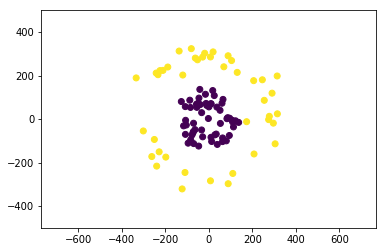

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
bdt.fit(XY_train, Z_train.values.ravel())

# Make predictions on the testing data and display resulting scatter plot
predictions = bdt.predict(XY_test)

# See how well it worked
print(confusion_matrix(Z_test,predictions))  
print(classification_report(Z_test,predictions))

# Display the test prediction results
plt.axis('equal')
plt.axis([-500, 500, -500, 500])

plt.scatter(XY_test.x, XY_test.y, c=predictions)
plt.show()
